In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import DataFrame
from itertools import cycle, islice
from matplotlib.colors import ListedColormap

In [80]:
dtypes_dict = {'advertiser_id':'category', 'action_id': np.float64, 'source_id': np.int8, 'created': str, \
                'country_code': np.int64, 'latitude': np.float64, 'longitude': np.float64, 'wifi_connection': bool, \
                'carrier_id': np.float16, 'os_minor': np.float32, 'os_major': np.float32, 'agent_device': np.float64, \
                'specs_brand': 'category', 'brand': np.float16, 'timeToClick': np.float64, 'touchX': np.float16, \
                'touchY': np.float16, 'ref_type': np.int64, 'ref_hash': np.int64}

clicks = pd.read_csv('data/train_clicks.csv.gzip', dtype=dtypes_dict)

In [23]:
clicks.head().T

,0,1,2,3,4
advertiser_id,2,0,0,2,2
action_id,NaN,NaN,NaN,NaN,NaN
source_id,4,0,0,3,3
created,2019-03-06T22:42:12.755Z,2019-03-08T10:24:30.641Z,2019-03-08T15:24:16.069Z,2019-03-06T03:08:51.543Z,2019-03-06T03:32:55.570Z
country_code,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268,6333597102633388268
latitude,1.20569,1.21892,1.20569,1.20569,1.20569
longitude,1.07023,1.07121,1.07023,1.07023,1.07023
wifi_connection,False,False,False,False,False
carrier_id,1,4,6,45,45
trans_id,iGgClCM9exiHF4K31g94XmvHEBSLKIY,MMHTOJ6qKAOeIH_Eywh1KIcCaxtO9oM,vIrEIdf9izUaWdAri6Ezk7T3nHFvNQU,YaKxxEAs2UmZhSpRfiCO9Zpa82B_AKM,X5XTOcYQovkl6yadYdAD7xioVGU9jiY


In [114]:
len(clicks)

26351

In [4]:
clicks.dtypes

advertiser_id        int64
action_id          float64
source_id            int64
created             object
country_code         int64
latitude           float64
longitude          float64
wifi_connection       bool
carrier_id         float64
trans_id            object
os_minor           float64
agent_device       float64
os_major           float64
specs_brand          int64
brand              float64
timeToClick        float64
touchX             float64
touchY             float64
ref_type             int64
ref_hash             int64
dtype: object

In [78]:
clicks.isnull().sum()

advertiser_id          0
action_id          26351
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
dtype: int64

In [16]:
#elimino esta columna porque posee todos NaN
clicks.drop('action_id', axis=1, inplace=True)

In [17]:
clicks.isnull().sum()

advertiser_id          0
source_id              0
created                0
country_code           0
latitude               0
longitude              0
wifi_connection        0
carrier_id            11
trans_id               0
os_minor              12
agent_device       23108
os_major              12
specs_brand            0
brand              20116
timeToClick         3374
touchX              3340
touchY              3340
ref_type               0
ref_hash               0
day                    0
year                   0
month                  0
week                   0
weekday                0
hour                   0
dtype: int64

In [180]:
clicks['agent_device'].value_counts()

3.516812e+18    656
1.754528e+18    326
6.882415e+18    156
7.787531e+18    132
4.281729e+18    122
4.445252e+18     99
6.589622e+18     87
2.066431e+17     81
3.686067e+17     75
8.656854e+18     74
5.990117e+18     72
7.116343e+18     70
1.063783e+18     68
2.616228e+18     64
8.163783e+18     62
8.604122e+18     47
3.977966e+18     46
2.438316e+18     43
4.430579e+18     33
1.181318e+18     32
5.960896e+18     28
1.540907e+18     28
8.535198e+18     23
3.432684e+18     23
3.051485e+18     22
1.321681e+18     22
2.293453e+18     21
1.966828e+18     20
6.558466e+18     20
7.628197e+18     19
               ... 
8.178177e+18      1
8.285870e+18      1
8.400757e+18      1
7.052220e+18      1
6.445596e+18      1
3.103697e+17      1
1.251416e+17      1
4.928434e+18      1
1.231797e+18      1
3.262918e+18      1
4.186571e+18      1
3.339732e+17      1
6.195314e+18      1
7.614489e+18      1
3.285184e+18      1
2.091433e+17      1
8.369550e+18      1
1.557569e+18      1
4.497716e+18      1


In [172]:
#veo cuáles no son nulas
clicks.loc[clicks['agent_device'].notnull(),['agent_device']];

In [81]:
#hay varios grupos
clicks['brand'].value_counts()

2.0     2027
0.0     1917
1.0     1521
4.0      240
3.0      186
5.0      129
6.0      124
7.0       32
9.0       31
8.0       16
10.0       8
12.0       3
13.0       1
Name: brand, dtype: int64

In [19]:
#lo paso a un tipo 'category' por haber pocos grupos
clicks['advertiser_id']=clicks['advertiser_id'].astype('category')
clicks['advertiser_id'].value_counts()

3    26263
0       70
2       12
7        2
1        2
8        1
5        1
Name: advertiser_id, dtype: int64

In [85]:
clicks['source_id'].value_counts()

0     17009
1      4298
6      3371
5      1628
2        27
3         9
10        3
7         2
4         2
9         1
8         1
Name: source_id, dtype: int64

In [87]:
clicks['created'].value_counts()

2019-03-10T01:37:34.402Z    2
2019-03-07T23:24:46.085Z    2
2019-03-07T23:16:30.731Z    2
2019-03-10T05:02:10.703Z    2
2019-03-09T11:31:23.385Z    1
2019-03-07T23:06:45.648Z    1
2019-03-10T11:40:10.320Z    1
2019-03-10T05:28:45.871Z    1
2019-03-10T10:46:14.643Z    1
2019-03-07T23:23:26.474Z    1
2019-03-13T00:09:53.642Z    1
2019-03-12T15:37:50.753Z    1
2019-03-07T23:54:24.844Z    1
2019-03-11T12:47:22.350Z    1
2019-03-12T23:52:09.462Z    1
2019-03-13T13:14:10.007Z    1
2019-03-10T05:02:13.663Z    1
2019-03-12T13:58:59.563Z    1
2019-03-13T22:12:56.053Z    1
2019-03-09T03:50:04.800Z    1
2019-03-07T23:52:25.307Z    1
2019-03-12T14:54:45.756Z    1
2019-03-08T08:28:52.019Z    1
2019-03-11T01:24:27.725Z    1
2019-03-11T15:44:17.157Z    1
2019-03-09T08:20:55.583Z    1
2019-03-10T07:02:04.467Z    1
2019-03-09T04:30:59.702Z    1
2019-03-13T10:01:28.879Z    1
2019-03-11T10:54:14.109Z    1
                           ..
2019-03-10T08:14:47.948Z    1
2019-03-12T02:25:49.178Z    1
2019-03-11

In [64]:
#le cambio el tipo a datetime
clicks['created'] = pd.to_datetime(clicks['created'], format='%Y-%m-%d %H:%M:%S')
clicks['created'].dtype

datetime64[ns, UTC]

In [70]:
clicks['day']=pd.DatetimeIndex(clicks['created']).day;
clicks['year']=pd.DatetimeIndex(clicks['created']).year;
clicks['month']=pd.DatetimeIndex(clicks['created']).month;
clicks['week']=pd.DatetimeIndex(clicks['created']).week;
#clicks['weekday']=pd.DatetimeIndex(clicks['created']).weekday;
clicks['hour']=pd.DatetimeIndex(clicks['created']).hour;

#weekdays={0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
#clicks['weekday'].replace(weekdays, inplace=True)

In [68]:
clicks['year'].value_counts()

2019    26351
Name: year, dtype: int64

In [71]:
clicks['month'].value_counts()

3    26351
Name: month, dtype: int64

In [72]:
clicks['hour'].value_counts()

1     4209
23    2726
2     2327
11    1455
22    1386
12    1199
10    1143
4     1079
16     966
15     959
5      945
13     926
14     834
9      754
3      754
6      678
18     655
17     641
8      537
7      518
21     451
0      440
20     389
19     380
Name: hour, dtype: int64

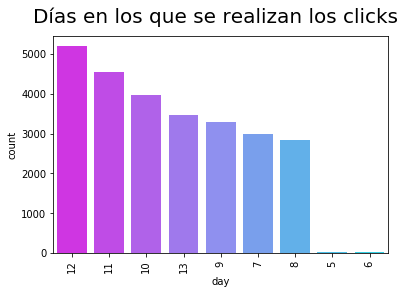

In [73]:
fig, ax1 = plt.subplots()
g=sns.countplot(x='day', data=clicks, palette='cool_r', order=clicks['day'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig.suptitle('Días en los que se realizan los clicks', fontsize=20)
plt.savefig('/home/ailen-magali/Documentos/dias_clicks.png', bbox_inches = 'tight', pad_inches = 0.1)

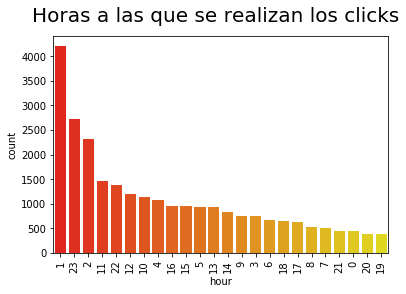

In [74]:
fig, ax1 = plt.subplots()
g=sns.countplot(x='hour', data=clicks, palette='autumn', order=clicks['hour'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig.suptitle('Horas a las que se realizan los clicks', fontsize=20)
plt.savefig('/home/ailen-magali/Documentos/horas_clicks.png', bbox_inches = 'tight', pad_inches = 0.1)

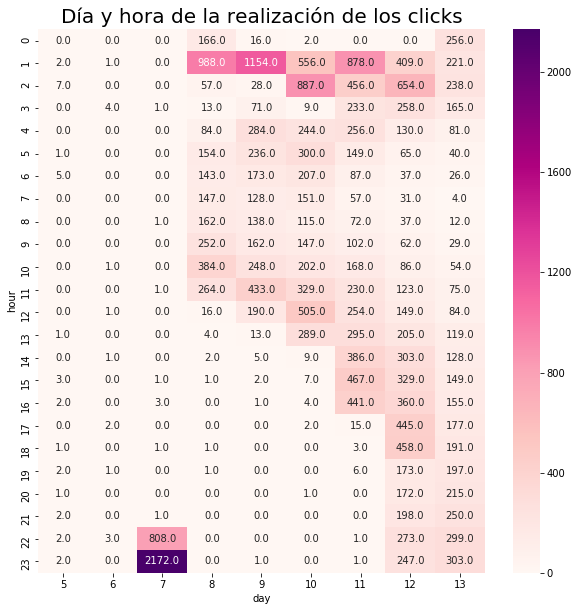

In [75]:
g=clicks.groupby(['hour', 'day'])['hour'].agg('count').unstack()
g=g.fillna(value=0)
plt.figure(figsize=(10,10))
ax=plt.axes()
sns.heatmap(g, cbar=True, cmap="RdPu", annot=True, fmt="")
ax.set_title('Día y hora de la realización de los clicks', fontsize=20)
plt.savefig('/home/ailen-magali/Documentos/dias_y_horas_clicks.png', bbox_inches = 'tight', pad_inches = 0.1)

In [94]:
#único país
clicks['country_code'].value_counts()

6333597102633388268    26351
Name: country_code, dtype: int64

In [163]:
#elimino esta columna y guardo el único valor en una variable
clicks.drop('country_code',axis=1,inplace=True)
country_code=6333597102633388268

In [179]:
#hay muchos grupos
clicks['latitude'].value_counts()

1.205689    22949
1.218924     1105
1.235406      281
1.205393      261
1.208059      186
1.205058      171
1.223819      100
1.209520       95
1.206592       90
1.209372       83
1.209165       75
1.211090       65
1.214036       53
1.205864       47
1.206684       45
1.230641       44
1.210313       40
1.216193       33
1.207268       30
1.217111       30
1.234142       26
1.208485       24
1.209638       24
1.215060       24
1.206435       22
1.206369       21
1.209330       20
1.208551       20
1.209100       20
1.222768       20
            ...  
1.206923        8
1.207905        8
1.208795        7
1.212213        7
1.209064        6
1.212601        5
1.209883        5
1.213918        5
1.218048        5
1.205771        5
1.211060        4
1.237861        4
1.208644        4
1.205833        4
1.205746        3
1.206181        3
1.212693        3
1.205951        3
1.206259        2
1.223550        2
1.206391        2
1.213671        2
1.222527        2
1.227118        2
1.206823  

In [91]:
#hay grupos
clicks['longitude'].value_counts()

1.070234    22949
1.071209     1105
1.063737      281
1.077238      250
1.069624      186
1.077332      171
1.059475      100
1.069958       90
1.065525       85
1.067147       83
1.062330       75
1.069987       65
1.085358       53
1.071447       45
1.060085       44
1.069973       41
1.078356       40
1.068226       33
1.067693       30
1.059728       30
1.073781       26
1.064208       24
1.066156       24
1.060796       24
1.071194       22
1.069933       21
1.075605       20
1.075580       20
1.068982       20
1.072560       20
            ...  
1.071944        8
1.073021        8
1.062970        7
1.060965        7
1.068144        6
1.059288        5
1.071220        5
1.058204        5
1.061768        5
1.062037        5
1.071446        4
1.071305        4
1.068549        4
1.073223        4
1.063440        3
1.069428        3
1.071895        3
1.082651        2
1.069308        2
1.064408        2
1.081584        2
1.072806        2
1.071822        2
1.070163        2
1.070100  

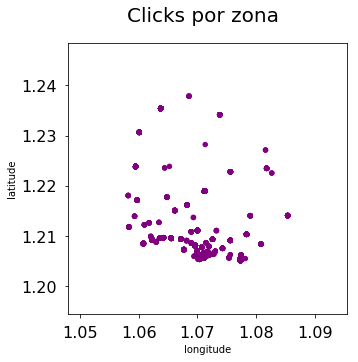

In [76]:
#Vemos que, como los puntos son muy cercanos entre sí, coincide con que el código de país sea único
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib
my_colors = list(islice(cycle(['purple']), None, len(clicks)))
clicks.plot("longitude", "latitude", kind="scatter", ax=ax1, figsize=(5,5), color=my_colors)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("longitude")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Clicks por zona', fontsize=20)
plt.savefig('/home/ailen-magali/Documentos/clicks_por_zona.png', bbox_inches = 'tight', pad_inches = 0.1)

In [93]:
clicks['wifi_connection'].value_counts()

False    26351
Name: wifi_connection, dtype: int64

In [49]:
clicks.groupby(['latitude','longitude']).agg({'country_code':'count'})

country_code
latitude longitude              
1.205058 1.077332            171
1.205325 1.070340             10
1.205356 1.070100              2
1.205393 1.070163              2
         1.070448              9
         1.077238            250
1.205475 1.078145              1
1.205554 1.071039             15
1.205655 1.075367             11
1.205689 1.070234          22949
1.205746 1.069973              3
1.205771 1.071220              5
1.205833 1.071305              4
1.205864 1.069878              9
         1.069973             38
1.205951 1.069428              3
1.205960 1.071483             14
1.206136 1.071841             15
1.206161 1.077422             15
1.206181 1.071895              3
1.206249 1.075591              2
1.206259 1.072127              2
1.206334 1.072639             14
1.206369 1.069933             21
1.206391 1.072806              2
1.206435 1.071194             22
1.206558 1.071011             15
1.206592 1.069958             90
1.206684 1.071447             45
1.206823 1.071822              2
...                          ...
1.210313 1.078356             40
1.210822 1.068929              9
1.211060 1.073223              4
1.211090 1.069987             65
1.211769 1.058311             13
1.212213 1.060965              7
1.212601 1.061768              5
1.212693 1.063440              3
1.213671 1.069308              2
1.213918 1.059288              5
1.214028 1.078973             11
1.214036 1.085358             53
1.215060 1.066156             24
1.216193 1.068226             33
1.217111 1.059728             30
1.217715 1.064799             13
1.218048 1.058204              5
1.218924 1.071209           1105
1.222527 1.082651              2
1.222768 1.075605             20
1.223465 1.081773             15
1.223550 1.064408              2
1.223819 1.059475            100
1.223863 1.065225              1
1.227118 1.081584              2
1.228208 1.071317              1
1.230641 1.060085             44
1.234142 1.073781             26
1.235406 1.063737            281
1.237861 1.068549              4

[82 rows x 1 columns]

In [168]:
#elimino la columna wifi_connection porque posee un unico valor, y creo una variable con ese valor
clicks.drop('wifi_connection',axis=1,inplace=True)
wifi_connection=False

In [95]:
#hay grupos
clicks['carrier_id'].value_counts()

4.0      4569
6.0      3474
1.0      3307
13.0     2998
3.0      2944
12.0     2273
0.0      1368
10.0      753
14.0      588
9.0       555
17.0      519
19.0      496
18.0      468
22.0      462
2.0       264
15.0      263
5.0       212
21.0      211
25.0      202
30.0      121
24.0      117
27.0       58
29.0       33
67.0       13
33.0       12
76.0        6
26.0        6
45.0        6
91.0        3
28.0        3
31.0        3
48.0        2
93.0        2
59.0        2
65.0        2
37.0        2
11.0        2
115.0       2
39.0        2
55.0        2
112.0       1
102.0       1
116.0       1
35.0        1
74.0        1
113.0       1
52.0        1
80.0        1
105.0       1
75.0        1
77.0        1
106.0       1
69.0        1
34.0        1
103.0       1
Name: carrier_id, dtype: int64

In [274]:
#no hay mucho por analizar acá
clicks['trans_id'].value_counts()


-bGATSp1K0hXL_mW-sLkpfIBGP5oXq0    1
jp43iLR3tjPxzs04TjXnY8y67yBvTcA    1
5Ir-70cS_tfuMyzS1_OiiTpodiadSzA    1
rZ5PbZMA9IRLjcBQsPeELm9LCT1dfuc    1
BQUWdPeHyyoWVJssGDrs9B67RXZpRXI    1
J1smyBNM1Oge3403oo5cTMGPBayN65o    1
r13sWHz1Rm8tnAhJDYS3uRXkUzTfwz8    1
nBDLrtni0GtvessM7M6L0fpYl-YpvsY    1
5acPBy1HbS_tuxO2i_7_DX3ec3gGXqc    1
k-P5UsiJWoXHc5OW9dJOb9Uj_aE_VZ0    1
vbA0Xf9dqZty6or06SeqlF2lZrvJRFo    1
YhblTJ1h4Na_Of8k-bHTWaGn8iR5iIM    1
L4diitsFcnGlIwEdoCknNvTG9OtA-fI    1
T4rGVUqJs6BWqK_gXNUGdMKNsDvxFv4    1
hFgMcGSKEynZmzFS5GhRzobO7xQn04E    1
QoedpWMl8GW_wi_A7MKtuaYeoAEgSgA    1
FUrgKLrCDfz3s-xAaVJlmBD2Qdiwsls    1
GdwXYjBluuwGf3xkS4zCiwh70Hh1fls    1
rxKHoeVM5o92m5rqvT2GQpKftgYXzw0    1
AZdEda-zFIVegMxrwxdP6-YvsNY-VOY    1
162YJi0rx_UWrKiVBV1uAUNqUn4o-S4    1
egUMol_C22WHlXzLmERKGK6-ACLl4WA    1
I3ilTLaH8Sbaua5GiPfkUbssJniNPKg    1
H04TLJiUQayLeqpXFdqkGVi2rxsQn40    1
KFKFp4TJx4hGocDenc8hW0vjGqHK99E    1
PMVR50afJyEzhhvD05Q325wpenmB3iQ    1
HRskqSSPlzoMRiPR8KMqHbnx0c7G5Kw    1
n

In [99]:
#hay varios grupos
clicks['os_minor'].value_counts()

3.378640e+18    6922
6.768137e+18    3747
5.975656e+18    3683
3.511538e+18    3257
6.391567e+18    3093
3.025219e+18    3047
3.875707e+18     651
3.399962e+18     591
7.553676e+18     576
6.666626e+17     445
4.213391e+18      79
4.106890e+18      44
8.613722e+18      36
8.502255e+18      35
3.178027e+18      34
3.138606e+18      22
7.209017e+18      20
7.728566e+18      13
2.455752e+18      10
9.175549e+17       8
6.380963e+18       8
4.463892e+18       5
4.206912e+18       3
5.476064e+18       3
6.423659e+18       2
9.081082e+18       2
7.699950e+18       2
7.837464e+18       1
Name: os_minor, dtype: int64

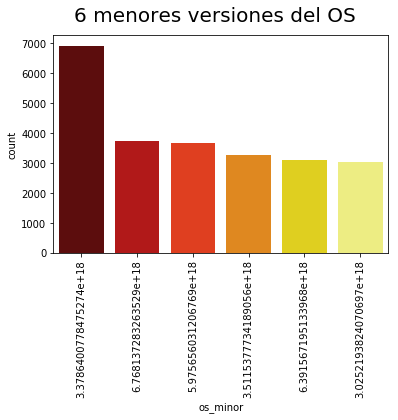

In [86]:
fig, ax1 = plt.subplots()
g=sns.countplot(x='os_minor', data=clicks, palette='hot', order=clicks['os_minor'].value_counts().iloc[:6].index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig.suptitle('6 menores versiones del OS', fontsize=20)
plt.savefig('/home/ailen-magali/Documentos/os_minor.png', bbox_inches = 'tight', pad_inches = 0.1)

In [3]:
clicks['os_major'].value_counts()

3.072849e+18    7430
4.566454e+18    6922
1.774085e+18    6304
7.452406e+18    3669
5.745805e+18     818
6.693579e+18     616
1.563830e+18     445
2.835312e+18      64
7.499732e+18      41
4.072211e+18      20
7.436481e+17       8
6.928183e+18       2
Name: os_major, dtype: int64

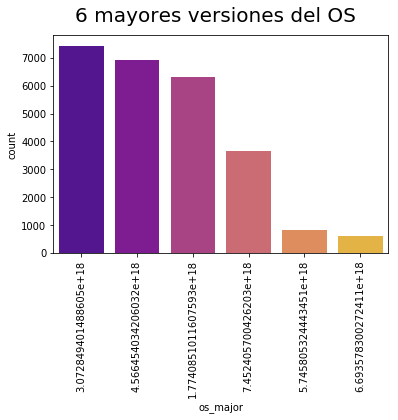

In [83]:
fig, ax1 = plt.subplots()
g=sns.countplot(x='os_major', data=clicks, palette='plasma', order=clicks['os_major'].value_counts().iloc[:6].index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig.suptitle('6 mayores versiones del OS', fontsize=20)
plt.savefig('/home/ailen-magali/Documentos/os_major.png', bbox_inches = 'tight', pad_inches = 0.1)

In [178]:
#pocos grupos
clicks['specs_brand']=clicks['specs_brand'].astype('category')
clicks['specs_brand'].value_counts()

392184377613098015     16172
2733035977666442898    10164
8930605132947907029       10
3855167788531275156        4
5675295985273558497        1
Name: specs_brand, dtype: int64

In [163]:
#VER BIEN
clicks.groupby(['brand','specs_brand']).agg('count')

advertiser_id  action_id  source_id  created  \
brand specs_brand                                                         
0.0   2733035977666442898         1831.0        0.0     1831.0   1831.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015            86.0        0.0       86.0     86.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
1.0   2733035977666442898          620.0        0.0      620.0    620.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015           901.0        0.0      901.0    901.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
2.0   2733035977666442898          391.0        0.0      391.0    391.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015          1636.0        0.0     1636.0   1636.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
3.0   2733035977666442898           32.0        0.0       32.0     32.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015           154.0        0.0      154.0    154.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
4.0   2733035977666442898           98.0        0.0       98.0     98.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015           142.0        0.0      142.0    142.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
5.0   2733035977666442898           48.0        0.0       48.0     48.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015            81.0        0.0       81.0     81.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
...                                  ...        ...        ...      ...   
7.0   2733035977666442898           10.0        0.0       10.0     10.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015            22.0        0.0       22.0     22.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
8.0   2733035977666442898            3.0        0.0        3.0      3.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015            13.0        0.0       13.0     13.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
9.0   2733035977666442898           31.0        0.0       31.0     31.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015             NaN        NaN        NaN      NaN   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
10.0  2733035977666442898            5.0        0.0        5.0      5.0   
      3855167788531275156            NaN        NaN        NaN      NaN   
      392184377613098015             3.0        0.0        3.0      3.0   
      5675295985273558497            NaN        NaN        NaN      NaN   
      8930605132947907029            NaN        NaN        NaN      NaN   
12.0  2733035977666442898            1.0        0.0 

In [9]:
#level0=grupo.columns.get_level_values(0)
#level1=grupo.columns.get_level_values(1)
#grupo.columns=level0+'-'+level1
#grupo.reset_index(inplace=True)

In [105]:
clicks['timeToClick'].value_counts()

0.261      11
0.267       9
0.210       9
0.338       9
2.221       8
0.232       8
2.043       8
0.252       8
2.041       8
0.194       7
0.340       7
2.252       7
4.179       7
1.917       7
1.676       7
2.892       7
0.187       7
0.251       7
1.717       7
0.226       6
0.352       6
1.792       6
0.384       6
0.308       6
0.271       6
0.219       6
0.482       6
1.664       6
0.272       6
1.839       6
           ..
147.252     1
482.467     1
6.415       1
649.753     1
51.070      1
11.795      1
59.467      1
36.624      1
15.268      1
13.609      1
2.256       1
183.282     1
1.975       1
13.924      1
437.556     1
37.382      1
267.876     1
13.370      1
221.478     1
37.270      1
77.196      1
55.258      1
375.753     1
62.718      1
5.702       1
900.099     1
443.978     1
330.022     1
12.388      1
11.000      1
Name: timeToClick, Length: 17294, dtype: int64

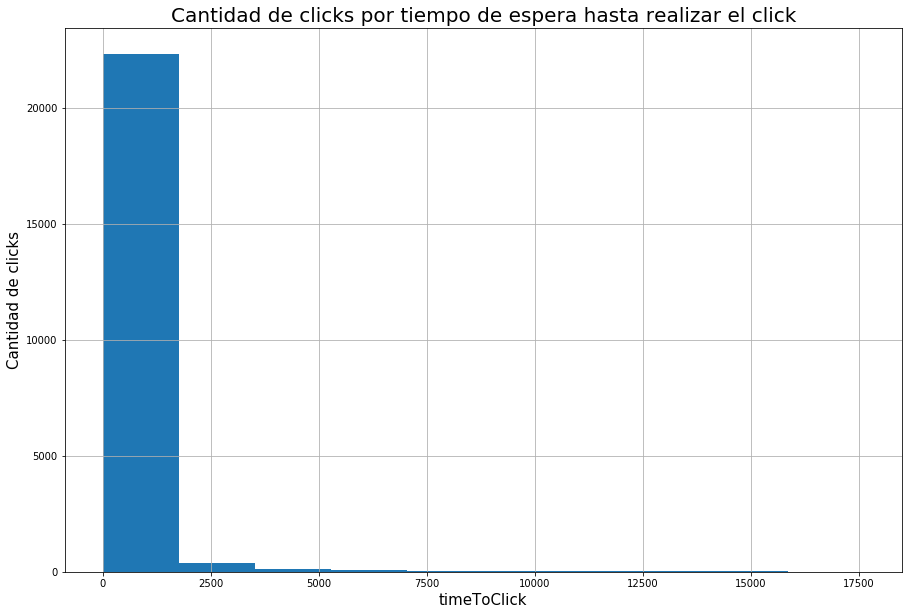

<Figure size 432x288 with 0 Axes>

In [87]:
plt.figure(figsize=(15,10))
plt.ylabel("Cantidad de clicks", fontsize=15)
plt.xlabel("timeToClick", fontsize=15)

plt.hist(clicks['timeToClick'], bins = 10)
plt.title('Cantidad de clicks por tiempo de espera hasta realizar el click', fontsize=20)
plt.grid(True)

plt.savefig('/home/ailen-magali/Documentos/clicks_por_timeToClick.png', bbox_inches = 'tight', pad_inches = 0.1)

plt.show()
plt.clf()

In [196]:
#El tiempo máximo (en segundos) que se demoró en realizar el click
clicks['timeToClick'].max()

17616.188000000002

In [197]:
#El tiempo mínimo (en segundos) que se demoró en realizar el click
clicks['timeToClick'].min()

0.017

In [12]:
clicks['timeToClick'].mean()

230.40330948339644

In [76]:
clicks.groupby(['latitude','longitude']).agg({'timeToClick':'mean'}).round(3).reset_index()

,latitude,longitude,timeToClick
0,1.205058,1.077332,189.463
1,1.205325,1.070340,499.535
2,1.205356,1.070100,1.152
3,1.205393,1.070163,6.137
4,1.205393,1.070448,48.710
5,1.205393,1.077238,123.098
6,1.205475,1.078145,9.924
7,1.205554,1.071039,67.302
8,1.205655,1.075367,116.170
9,1.205689,1.070234,229.608


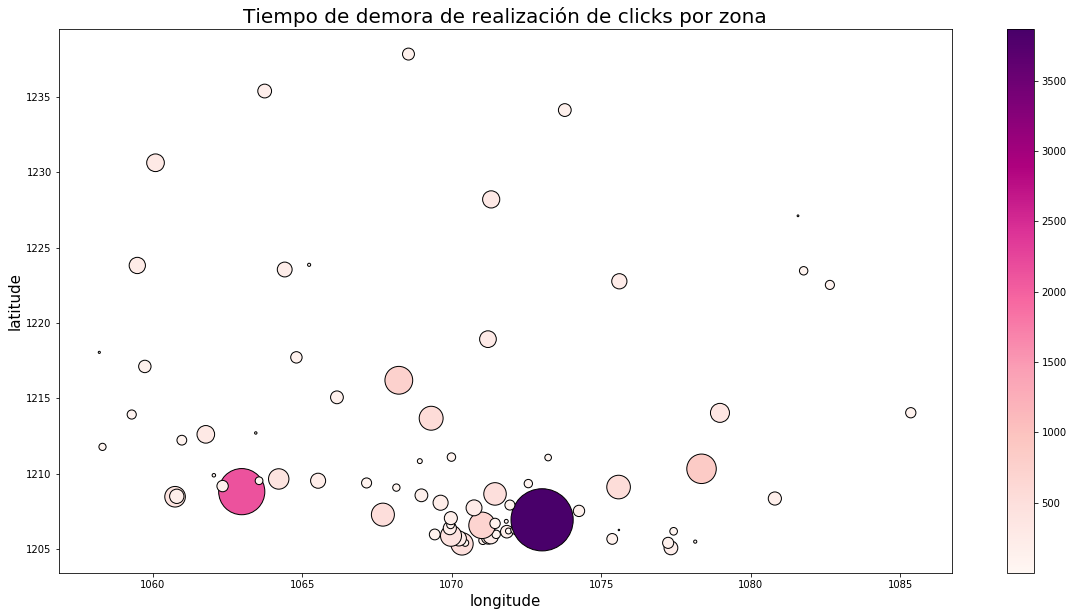

<Figure size 432x288 with 0 Axes>

In [88]:
#Analizamos en qué zonas se tarda más en realizar un click
g=clicks.groupby(['latitude','longitude']).agg({'timeToClick':'mean'}).round(3).reset_index()

x = g['longitude']*1000
y = g['latitude']*1000
s = g['timeToClick']
colors = g['timeToClick']

plt.figure(figsize=(20,10))
plt.ylabel('latitude', fontsize=15)
plt.xlabel('longitude', fontsize=15)
plt.scatter(x, y, s=s, c=colors, cmap='RdPu', edgecolors='black')
plt.colorbar()

plt.title('Tiempo de demora de realización de clicks por zona', fontsize=20)

plt.savefig('/home/ailen-magali/Documentos/timeToClick_por_zona.png', bbox_inches = 'tight', pad_inches = 0.1)

plt.show()
plt.clf()

In [109]:
clicks['touchY'].value_counts()

0.000     193
0.998     140
0.994      81
0.996      80
0.023      79
0.026      76
0.037      75
0.990      74
0.052      72
0.035      71
0.988      70
0.991      65
0.050      64
0.056      64
0.051      63
0.044      60
0.003      59
0.984      58
0.055      58
0.031      57
0.053      56
0.022      55
0.999      55
0.020      55
0.018      54
0.060      54
0.995      54
0.025      52
0.079      52
0.047      52
         ... 
9.971       1
1.622       1
13.325      1
9.946       1
11.110      1
1.382       1
2.602       1
7.509       1
1.914       1
8.358       1
3.652       1
9.214       1
3.245       1
4.700       1
12.474      1
10.479      1
11.374      1
8.405       1
7.477       1
7.521       1
3.912       1
9.500       1
5.207       1
8.085       1
10.584      1
8.786       1
1.535       1
5.185       1
8.748       1
12.333      1
Name: touchY, Length: 3914, dtype: int64

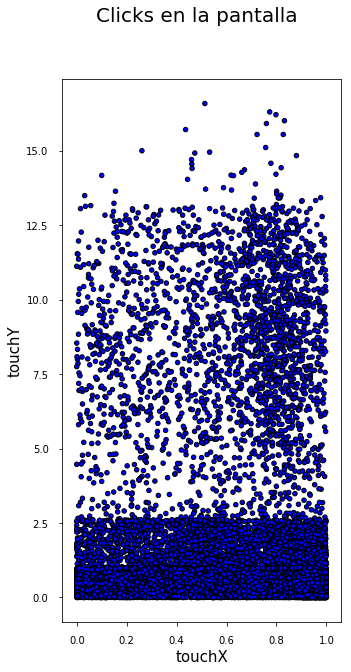

In [92]:
fig, ax1 = plt.subplots() # prepara un gráfico de matplotlib

my_colors = list(islice(cycle(['B']), None, len(clicks)))

clicks.plot("touchX", "touchY", kind="scatter", ax=ax1, figsize=(5,10), color=my_colors, edgecolor='Black')
# realiza ajustes al gráfico con matplotlib:
ax1.set_ylabel("touchY", fontsize=15)
ax1.set_xlabel("touchX", fontsize=15)
ax1.tick_params(labelsize=10, pad=10)
fig.suptitle('Clicks en la pantalla', fontsize=20)

plt.savefig('/home/ailen-magali/Documentos/clicks_en_pantalla.png', bbox_inches = 'tight', pad_inches = 0.1)

In [31]:
#elimino los nan y los reemplazo por 0
clicks.loc[(clicks['touchX']).isnull(),['touchX']]=0

In [33]:
clicks['touchX'].isnull().sum()

0

In [34]:
#elimino los nan y los reemplazo por 0
clicks.loc[(clicks['touchY']).isnull(),['touchY']]=0

In [35]:
clicks['touchY'].isnull().sum()

0

In [136]:
clicks['ref_type'].value_counts()

1891515180541284343    25549
1494519392962156891      739
Name: ref_type, dtype: int64

In [93]:
clicks.drop(clicks[clicks['ref_type']==5016171802147987303].index, inplace=True)
clicks.drop(clicks[clicks['ref_type']==6323871695571587575].index, inplace=True)

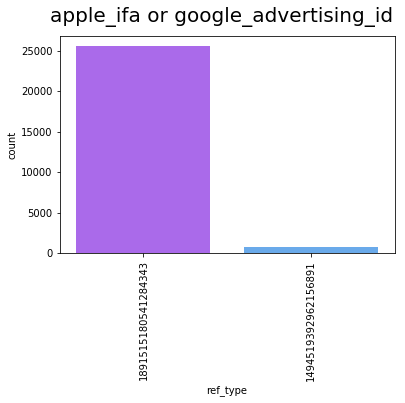

In [94]:
fig, ax1 = plt.subplots()
g=sns.countplot(x='ref_type', data=clicks, palette='cool_r', order=clicks['ref_type'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
fig.suptitle('apple_ifa or google_advertising_id', fontsize=20)

plt.savefig('/home/ailen-magali/Documentos/ref_type.png', bbox_inches = 'tight', pad_inches = 0.1)

In [112]:
clicks['ref_hash'].value_counts()

4063522808706112974    41
6841615430383729819    32
1244272413279716745    26
871778630200697460     21
1486699123421703687    21
5087801386146573665    20
925803901826809324     17
5410279713092214908    16
6972928558719957056    16
5141358577301248038    16
519658456951133298     16
1840632706493884506    16
1331942267794810997    14
1211156366060784398    14
1800317677967270083    14
8649985029035959510    14
6720955205547143860    14
8292793494956750501    14
9122294037688413433    14
4087245142961821607    13
2878289124029282270    13
4743839512322600375    12
1022865914163198106    12
9013086364156440526    12
2108916708309430205    12
7298861376107043945    12
2161849021063988604    12
5137915707382060256    12
3272242210010018861    12
7539041810210425316    12
                       ..
1131153511584379029     1
6624531815907593673     1
8656402155431163452     1
5268701924955006446     1
5564448142525849564     1
1534878130600836246     1
2721577658846468141     1
302491930980

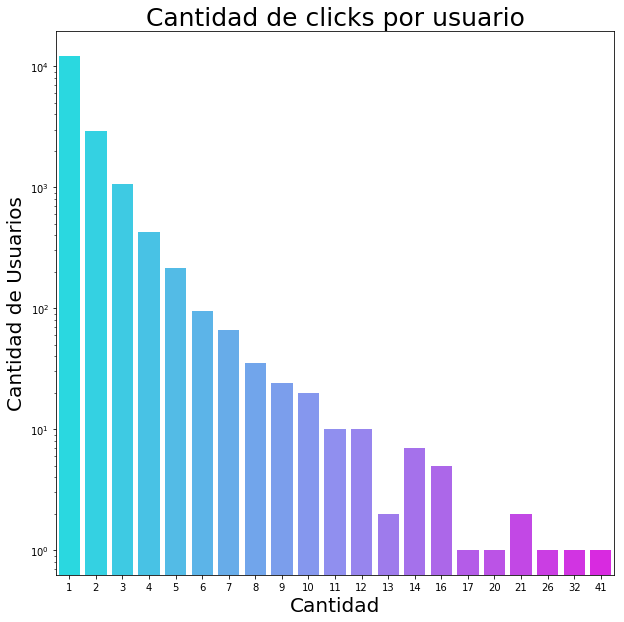

In [97]:
ref_hash_len = clicks['ref_hash'].value_counts()
plt.figure(figsize=(10, 10))
hash_ref_group = sns.countplot(x=ref_hash_len, data=clicks, palette='cool', log=True)
hash_ref_group.set_title("Cantidad de clicks por usuario", fontsize =25)
hash_ref_group.set_xlabel('Cantidad', fontsize = 20)
hash_ref_group.set_ylabel("Cantidad de Usuarios", fontsize = 20)
plt.savefig('/home/ailen-magali/Documentos/clicks_bar_ref_hash.png')